# Importing Libraries

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [358]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv("insurance.csv")
#This dataset is from United States

In [359]:
# First 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [360]:
# Number of rows and columns
df.shape

(1338, 7)

In [361]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [362]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [363]:
#Checking for duplicate values
df.duplicated().sum()

1

In [364]:
#Dropping duplicate value
df.drop_duplicates(inplace=True)

In [365]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hp\AppData\Local\Temp\ipykernel_7584\2216273362.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




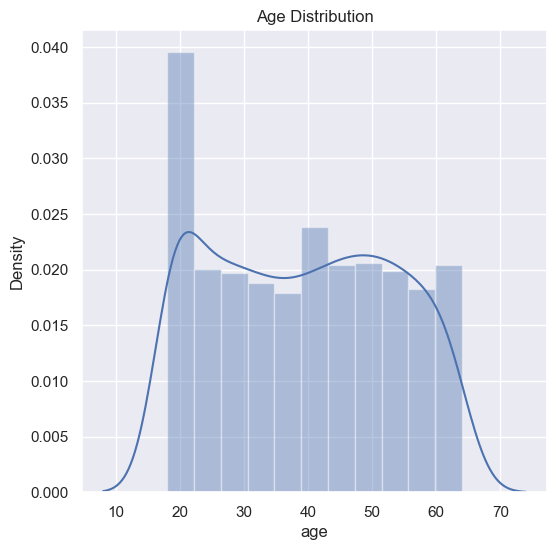

In [366]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

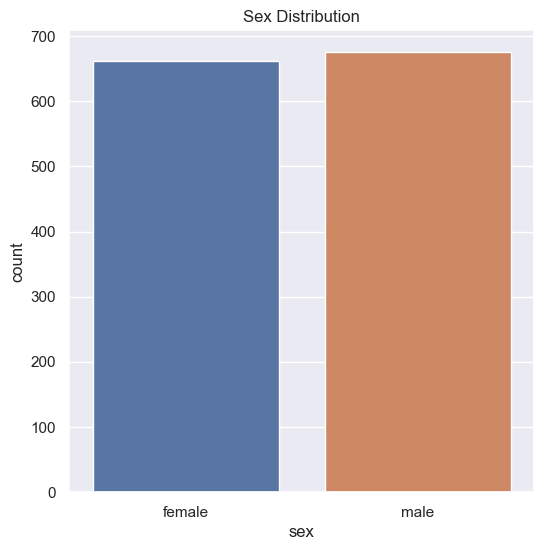

In [367]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [368]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_7584\2778200837.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




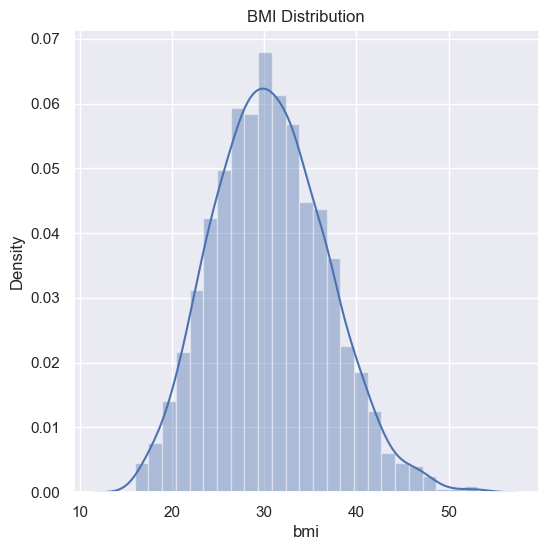

In [369]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

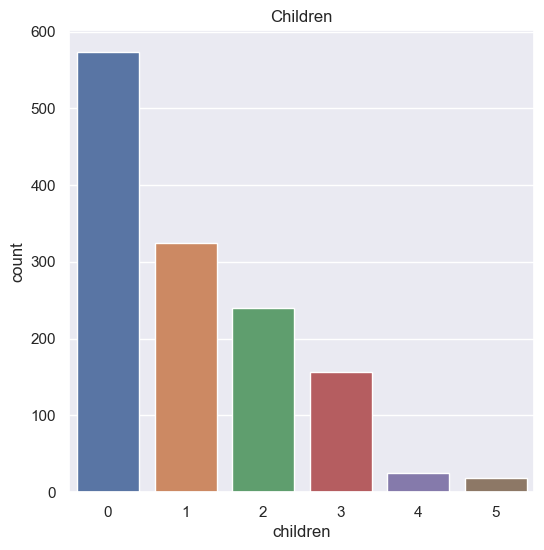

In [370]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [371]:
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

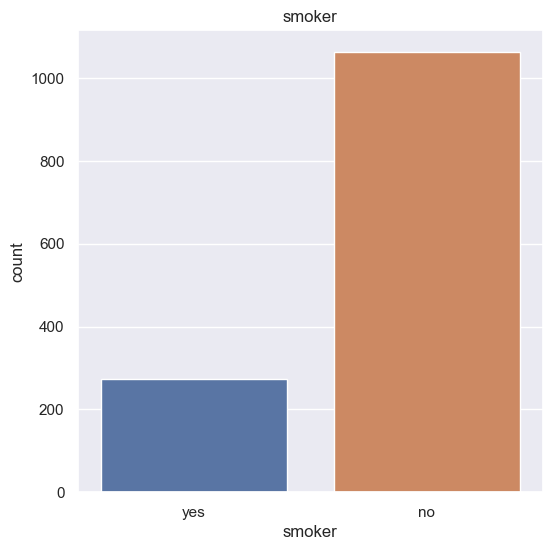

In [372]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [373]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

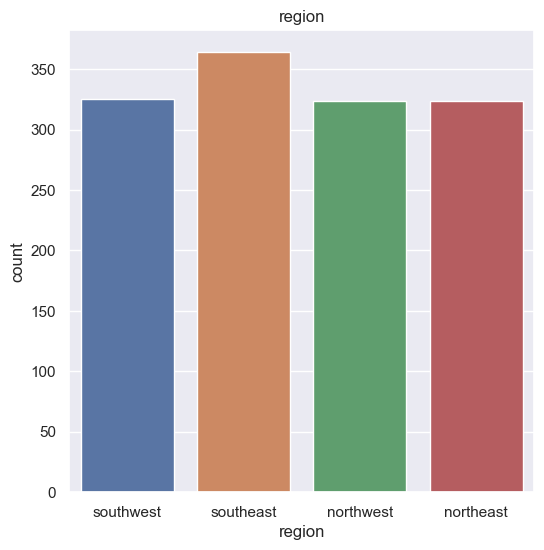

In [374]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [375]:
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_7584\2423477084.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




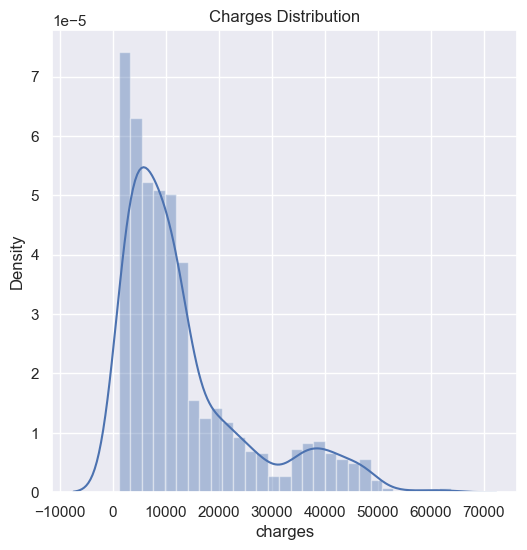

In [376]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

In [377]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [378]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# Using Linear Regression

In [379]:
#Splitting the Features and Target
x = df.drop(columns = ["charges"])
y = df.charges

In [380]:
#Splitting the data into Training data & Testing Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

In [381]:
# Model Training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [382]:
# Prediction on test data 
y_pred = regression.predict(x_test)

In [383]:
# R squared value
metrics.r2_score(y_test, y_pred)

0.7541897668783121

# Optimizing the model using target transformation

C:\Users\hp\AppData\Local\Temp\ipykernel_7584\3271766579.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




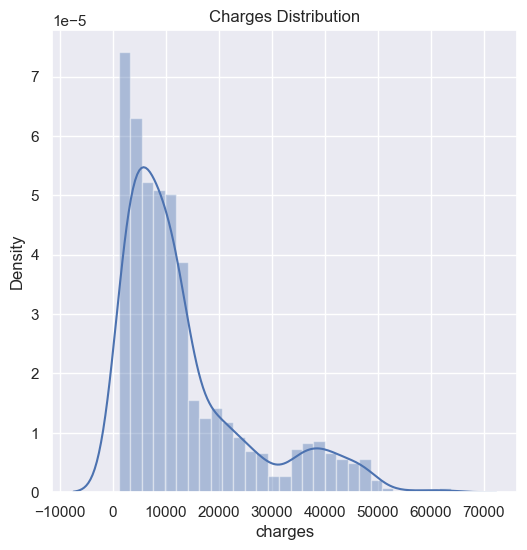

In [385]:
# Target column is skewed which tends to reduce model efficiency
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [386]:
# Tranforming target column using log
trans_y = np.log(df.charges)

C:\Users\hp\AppData\Local\Temp\ipykernel_7584\2319486186.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




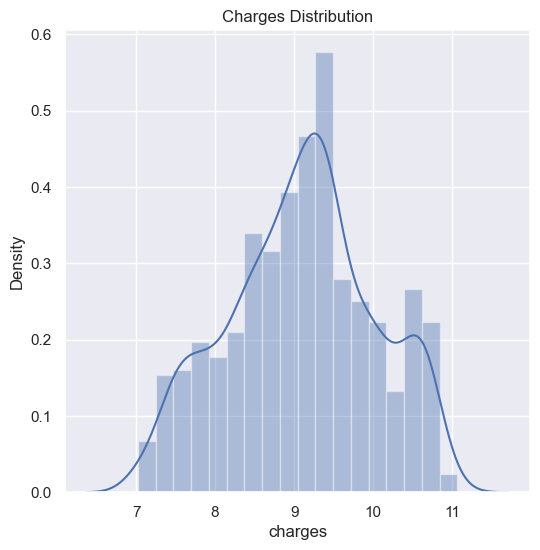

In [387]:
# distribution of transfored charges value
plt.figure(figsize=(6,6))
sns.distplot(np.log(df.charges))
plt.title('Charges Distribution')
plt.show()

In [388]:
# Splitting the new data into Training data & Testing Data
x_train, x_test, y_train, y_test = train_test_split(x, trans_y, test_size=0.4, random_state=2)

In [389]:
# Model Training
regression.fit(x_train, y_train)

LinearRegression()

In [390]:
# prediction on training data
y_pred = regression.predict(x_test)

In [391]:
# New R2 score
metrics.r2_score(y_test, y_pred)

0.7764553093046821

# Using Lasso Regression

In [409]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Fit a Lasso regression model
lasso = Lasso(alpha=0.001)  # alpha is the regularization strength
lasso.fit(x_train, y_train)

# Evaluate the model on the testing set
score = lasso.score(X_test, y_test)
print("R^2 score on testing set:", score)

R^2 score on testing set: 0.7762602972471744


# Using Random Forest

In [422]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100)

# Train the model on the training set
rf.fit(x_train, y_train)

# Evaluate the model on the testing set
score = rf.score(x_test, y_test)
print("R^2 score on testing set:", score)

R^2 score on testing set: 0.8225234463835668


# Final Predictive System

In [428]:
input_data = (37,0,29.830,2,0,2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = np.exp(rf.predict(input_data_reshaped))

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  20142.251339368526
